In [71]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import chardet
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
# Set how pd displays the float value
pd.set_option('display.float_format', lambda x: '%.2f' % x)


<span style="font-size:20pt;">Process the indicator data</span>


In [63]:
cda = pd.read_csv('./selected_indicators/CDA_ind.csv')
cda

,code,iso,country,CDA.ind.1995,CDA.ind.1996,CDA.ind.1997,CDA.ind.1998,CDA.ind.1999,CDA.ind.2000,CDA.ind.2001,...,CDA.ind.2013,CDA.ind.2014,CDA.ind.2015,CDA.ind.2016,CDA.ind.2017,CDA.ind.2018,CDA.ind.2019,CDA.ind.2020,CDA.ind.2021,CDA.ind.2022
0,4,AFG,Afghanistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,40.35,79.21,83.90,83.90,83.90,83.90
1,8,ALB,Albania,100.00,100.00,100.00,100.00,100.00,70.71,31.24,...,33.96,26.67,28.54,35.09,37.15,40.26,42.27,42.27,42.27,42.27
2,12,DZA,Algeria,34.02,34.02,34.02,34.02,34.02,39.51,46.29,...,26.33,26.38,19.93,18.24,18.08,18.51,18.83,18.83,18.83,18.83
3,20,AND,Andorra,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,...,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00
4,24,AGO,Angola,2.13,2.13,2.13,2.13,2.13,8.00,16.02,...,7.23,0.00,0.00,4.81,13.99,26.83,38.98,38.98,38.98,38.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,876,WLF,Wallis and Futuna Islands,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,...,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00
216,732,ESH,Western Sahara,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,...,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00,-8888.00
217,887,YEM,Yemen,15.54,15.54,15.54,15.54,15.54,7.15,1.70,...,40.77,43.60,53.40,55.02,56.54,58.22,56.61,56.61,56.61,56.61
218,894,ZMB,Zambia,70.09,70.09,70.09,70.09,70.09,80.48,83.31,...,5.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
def process_year(year_str):
    return int(year_str.split(".")[-1])

cda_long = cda.melt(id_vars=["country", "iso", "code"], var_name="year", value_name="CDA").drop(columns=['code'])
cda_long['year']=cda_long['year'].apply(process_year)
cda_long

,country,iso,year,CDA
0,Afghanistan,AFG,1995,0.00
1,Albania,ALB,1995,100.00
2,Algeria,DZA,1995,34.02
3,Andorra,AND,1995,-8888.00
4,Angola,AGO,1995,2.13
...,...,...,...,...
6155,Wallis and Futuna Islands,WLF,2022,-8888.00
6156,Western Sahara,ESH,2022,-8888.00
6157,Yemen,YEM,2022,56.61
6158,Zambia,ZMB,2022,0.00


<span style="font-size:20pt;">Process the GDP data</span>


In [65]:
file_path = './WEO_Data.csv'

# Check the encoding method
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

# Read the file with the detected encoding method
weo = pd.read_csv(file_path, encoding=result['encoding'])
weo


,WEO Country Code,ISO,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Estimates Start After
0,213.00,ARG,Argentina,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office Latest actu...,422.63,445.987,482.16,...,702.306,721.487,706.478,726.39,707.377,693.224,624.295,689.211,725.346,2021.00
1,213.00,ARG,Argentina,"Gross domestic product, constant prices",Percent change,NaN,"See notes for: Gross domestic product, consta...",-2.845,5.527,8.111,...,-2.513,2.731,-2.08,2.819,-2.617,-2.001,-9.943,10.398,5.243,2021.00
2,213.00,ARG,Argentina,"Gross domestic product, current prices",U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",288.497,304.282,327.436,...,563.614,642.464,556.774,643.861,524.431,451.815,389.064,486.702,632.241,2021.00
3,213.00,ARG,Argentina,"Gross domestic product per capita, constant pr...",National currency,Units,"See notes for: Gross domestic product, consta...","12,151.83","12,671.67","13,542.17",...,"16,459.21","16,727.44","16,207.20","16,492.07","15,898.09","15,425.98","13,754.60","15,034.49","15,666.09",2010.00
4,213.00,ARG,Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","8,295.12","8,645.46","9,196.52",...,"13,208.83","14,895.32","12,772.87","14,618.33","11,786.43","10,054.02","8,571.94","10,616.95","13,655.20",2010.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
gdp = weo[(weo["Subject Descriptor"] == "Gross domestic product, constant prices") & (weo["Units"] == "National currency")].drop(columns=["WEO Country Code", "Subject Descriptor", "Units", "Scale", "Country/Series-specific Notes", "Estimates Start After"])
gdp

,ISO,Country,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ARG,Argentina,422.63,445.987,482.16,500.725,483.773,479.956,458.795,408.812,...,720.407,702.306,721.487,706.478,726.39,707.377,693.224,624.295,689.211,725.346
6,AUS,Australia,983.663,"1,023.25","1,070.56","1,120.34","1,169.14","1,205.29","1,237.29","1,288.82",...,"1,779.37","1,824.91","1,866.58","1,916.81","1,962.48","2,017.73","2,056.95","2,019.64","2,124.58","2,202.36"
12,BRA,Brazil,705.992,721.586,746.082,748.605,752.108,785.111,796.023,820.328,...,"1,230.25","1,236.45","1,192.61","1,153.54","1,168.80","1,189.65","1,204.17","1,164.71","1,222.82","1,258.29"
18,CAN,Canada,"1,188.66","1,207.91","1,259.61","1,308.69","1,376.25","1,447.51","1,473.42","1,517.89",...,"1,869.76","1,923.42","1,936.10","1,955.49","2,014.93","2,070.89","2,109.99","2,002.92","2,103.31","2,174.74"
24,CHN,China,"11,473.20","12,611.46","13,777.67","14,860.05","16,001.37","17,357.02","18,800.95","20,514.56",...,"60,219.52","64,670.54","69,209.37","73,950.57","79,087.70","84,426.81","89,451.02","91,456.54","99,184.26","102,147.61"
30,DNK,Denmark,"1,445.80","1,487.80","1,536.30","1,570.30","1,616.60","1,677.20","1,691.00","1,698.90",...,"1,856.50","1,886.50","1,930.70","1,993.40","2,049.60","2,090.40","2,121.60","2,079.30","2,180.30","2,259.30"
36,FIN,Finland,137.709,142.759,151.802,160.086,167.097,176.744,181.356,184.452,...,211.012,210.242,211.385,217.328,224.266,226.822,229.599,224.192,231.022,235.836
42,FRA,France,"1,579.84","1,601.31","1,638.70","1,697.66","1,753.55","1,825.73","1,861.07","1,882.93",...,"2,131.61","2,152.17","2,174.87","2,196.22","2,250.02","2,291.06","2,334.23","2,149.67","2,295.20","2,355.01"
48,DEU,Germany,"2,328.27","2,347.26","2,389.17","2,437.44","2,483.43","2,555.54","2,598.65","2,593.43",...,"2,917.17","2,981.84","3,026.19","3,093.67","3,176.58","3,207.83","3,241.64","3,121.95","3,203.89","3,260.86"
54,IND,India,"29,558.71","31,790.31","33,077.72","35,123.36","38,095.83","39,610.14","41,568.62","43,192.88",...,"98,013.70","105,276.70","113,694.90","123,081.90","131,445.80","139,929.10","145,346.40","136,871.20","149,258.40","159,453.69"


In [67]:
gdp_long = gdp.melt(id_vars=["Country", "ISO"], var_name="year", value_name="GDP")
gdp_long[["year", "GDP"]] = gdp_long[["year", "GDP"]].apply(lambda x: x.str.replace(",", "")).apply(pd.to_numeric)
gdp_long

,Country,ISO,year,GDP
0,Argentina,ARG,1995,422.63
1,Australia,AUS,1995,983.66
2,Brazil,BRA,1995,705.99
3,Canada,CAN,1995,1188.66
4,China,CHN,1995,11473.20
...,...,...,...,...
471,Kenya,KEN,2022,9895.90
472,Mexico,MEX,2022,18355.59
473,Nigeria,NGA,2022,75768.95
474,South Africa,ZAF,2022,4596.28


<span style="font-size:20pt;">Merge GDP & CDA</span>

In [68]:
merged = pd.merge(gdp_long, cda_long, left_on=["ISO", "year"], right_on=["iso", "year"]).drop(columns=["iso", "country"])
merged  


,Country,ISO,year,GDP,CDA
0,Argentina,ARG,1995,422.63,28.71
1,Australia,AUS,1995,983.66,33.93
2,Brazil,BRA,1995,705.99,16.81
3,Canada,CAN,1995,1188.66,40.64
4,China,CHN,1995,11473.20,24.26
...,...,...,...,...,...
471,Kenya,KEN,2022,9895.90,18.72
472,Mexico,MEX,2022,18355.59,56.98
473,Nigeria,NGA,2022,75768.95,37.41
474,South Africa,ZAF,2022,4596.28,54.56


<span style="font-size:20pt;">Calculate Pearson Correlation</span>

In [69]:
def calculate_correlation_by_country(data, country, col1, col2):
    country_data = data[data["Country"] == country]
    correlation, _ = pearsonr(country_data[col1], country_data[col2])
    return correlation

In [79]:
def calculate_correlations_by_year(data, country, gdp_col, indicator_col, window_size):
    country_data = data[data["Country"] == country].dropna(subset=[gdp_col, indicator_col])
    min_year = country_data["year"].min()
    max_year = country_data["year"].max()
    
    correlations = []
    for start_year in range(min_year, max_year - window_size + 1):
        end_year = start_year + window_size
        window_data = country_data[(country_data["year"] >= start_year) & (country_data["year"] < end_year)]
        if len(window_data) < 2:
            continue
        correlation, _ = pearsonr(window_data[gdp_col], window_data[indicator_col])
        correlations.append({"start_year": start_year, "end_year": end_year, "correlation": correlation})
    
    return pd.DataFrame(correlations)

country = "China"
correlations_by_year = calculate_correlations_by_year(merged, country, "GDP", "CDA", window_size=10)
correlations_by_year


,start_year,end_year,correlation
0,1995,2005,0.38
1,1996,2006,-0.33
2,1997,2007,-0.69
3,1998,2008,-0.83
4,1999,2009,-0.89
5,2000,2010,-0.92
6,2001,2011,-0.88
7,2002,2012,-0.82
8,2003,2013,-0.74
9,2004,2014,-0.63


In [78]:
def calculate_correlations_by_year(data, country, gdp_col, indicator_col, window_size):
    country_data = data[data["Country"] == country].dropna(subset=[gdp_col, indicator_col])
    min_year = country_data["year"].min()
    max_year = country_data["year"].max()
    
    correlations = []
    for start_year in range(min_year, max_year - window_size + 1):
        end_year = start_year + window_size
        window_data = country_data[(country_data["year"] >= start_year) & (country_data["year"] < end_year)]
        if len(window_data) < 2:
            continue
        correlation, _ = pearsonr(window_data[gdp_col], window_data[indicator_col])
        correlations.append({"start_year": start_year, "end_year": end_year, "correlation": correlation})
    
    return pd.DataFrame(correlations)

country = "China"
correlations_by_year = calculate_correlations_by_year(merged, country, "GDP", "CDA", 2)
correlations_by_year


/Users/zhouzhongle/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,start_year,end_year,correlation
0,1995,1997,NaN
1,1996,1998,NaN
2,1997,1999,NaN
3,1998,2000,NaN
4,1999,2001,1.00
5,2000,2002,1.00
6,2001,2003,1.00
7,2002,2004,-1.00
8,2003,2005,-1.00
9,2004,2006,-1.00


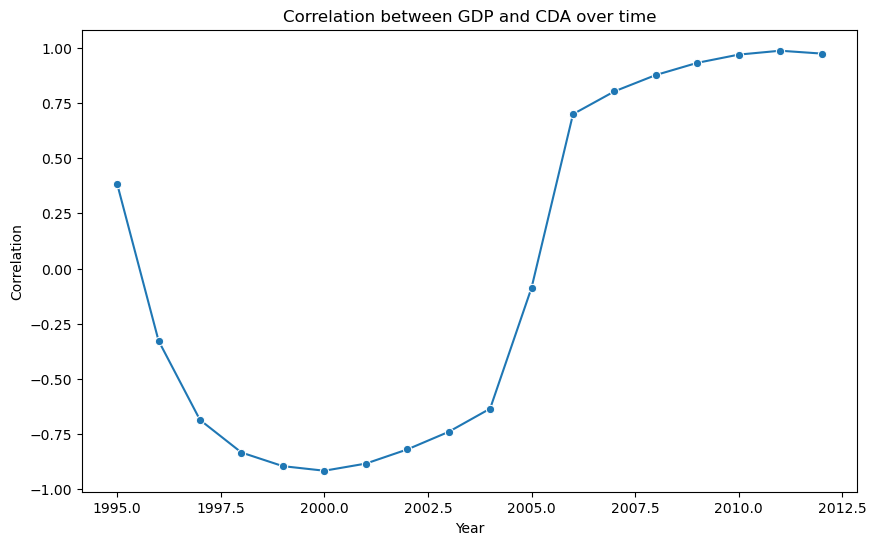

In [80]:
def plot_correlations_by_year(correlations_by_year):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=correlations_by_year, x="start_year", y="correlation", marker="o")
    
    plt.title("Correlation between GDP and CDA over time")
    plt.xlabel("Year")
    plt.ylabel("Correlation")
    
    plt.show()

plot_correlations_by_year(correlations_by_year)